**<h1>DATA ANALYSIS ON MARKETING_EXPENDITURE</h1>**

**<h2>DESCRIPTION</h2>**

The Social Media Advertising dataset is a collection of data related to various social media advertising campaigns. It includes information such as campaign id,target audiance,campaign goal,duration,acquisition cost,impressions, clicks, spend, customer segments, and conversion rates,etc.... The dataset includes multiple social media platforms such as Facebook, Instagram, Pinterest, and Twitter, providing a wide range of advertising campaign data.

### Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

### Data Collection

In [ ]:
# Load the dataset
data = pd.read_csv('/content/Book1.csv')
# Display the first few rows and summary of the dataset
print("First few rows of the dataset:")
print(data.head())
print()
print('=================================================================================')
print("\nSummary of dataset:")
print(data.info())

First few rows of the dataset:
   Campaign_ID Target_Audience     Campaign_Goal Duration Channel_Used  \
0       529013       Men 35-44    Product Launch  15 Days    Instagram   
1       275352     Women 45-60  Market Expansion  15 Days     Facebook   
2       692322       Men 45-60    Product Launch  15 Days    Instagram   
3       675757       Men 25-34    Increase Sales  15 Days    Pinterest   
4       535900       Men 45-60  Market Expansion  15 Days    Pinterest   

   Conversion_Rate Acquisition_Cost       ROI     Location Language  Clicks  \
0              NaN         $500.00   5.790000    Las Vegas  Spanish   500.0   
1             0.01         $500.00   7.210000  Los Angeles   French   500.0   
2             0.08         $500.00   0.430000       Austin  Spanish   500.0   
3              NaN         $500.00   0.909824        Miami  Spanish   293.0   
4             0.13         $500.00   1.422828       Austin   French   293.0   

   Impressions  Engagement_Score Customer_Segment

**<h2>Info about each and every feature present in the data set</h2>**

**1 champaign_Id** : Identification number

**2 Target_Audience** : Focusing on a group of people for the purpose of marketing

**3 Campaign_Goal** : Aim of that particular campaign

**4  Channel_Used** : Through which channel their campaign reached the people

**5 Conversion_Rate** : Estimating how much percent of people will be interested after watching their marketing strategies

**6 Acquisition_Cost** : Total amount spent by the companies for the purpose of marketing

**7 ROI** : return of investment i.e. profit

**8 Location** : location of the company

**9 Language** : language

**10 Clicks** : it is nothing but how many user used their website or used links etc...

**11 Impressions** : how many times stratagies displayed to the user is known as impressions

**12 Engagement_Score** : it is a measure of users showing interest towards the marketing strategies

**13 Customer_Segment** : dividing the group of people who have similar needs

**14 Date** : date

**15 Company** : company name



##### Here we are checking do we having null values or not in the dataset

In [ ]:
data.isnull().sum()

,0
Campaign_ID,0
Target_Audience,0
Campaign_Goal,0
Duration,2507
Channel_Used,0
Conversion_Rate,2511
Acquisition_Cost,0
ROI,0
Location,0
Language,0


##### here we are checking size of the dataframe

In [ ]:
data.shape

(49999, 16)

### Data Validation

##### Here we are doing data validation for Target_Audience column because it has both gender and age in the same column. To make it clear, we are separating them by adding a new Target_Age column.


In [ ]:
data['Target_Audience'].unique()

array(['Men 35-44', 'Women 45-60', 'Men 45-60', 'Men 25-34',
       'Women 35-44', 'All Ages', 'Women 25-34', 'Men 18-24',
       'Women 18-24'], dtype=object)

In [ ]:
# Initialize a 'Target_Age' column
data['Target_Age'] = ""

# Use a for loop to update 'Target_Age' and 'Target_Audience'
for i in range(len(data)):
    target_audience = data.loc[i, 'Target_Audience']

    # If the Target_Audience is "all ages"
    if target_audience.lower() == "all ages":
        data.loc[i, 'Target_Age'] = "18 - 60"
        data.loc[i, 'Target_Audience'] = "both"
    else:
        # For other values, split the Target_Audience
        split_value = target_audience.split(' ', 1)
        data.loc[i, 'Target_Age'] = split_value[1] if len(split_value) > 1 else ""
        data.loc[i, 'Target_Audience'] = split_value[0]

# Insert 'Target_Age' column next to 'Target_Audience'
data.insert(data.columns.get_loc('Target_Audience') + 1, 'Target_Age', data.pop('Target_Age'))

# Display the updated DataFrame
print(data['Target_Audience'])
print(data['Target_Age'])

0          Men
1        Women
2          Men
3          Men
4          Men
         ...  
49994    Women
49995    Women
49996    Women
49997      Men
49998    Women
Name: Target_Audience, Length: 49999, dtype: object
0        35-44
1        45-60
2        45-60
3        25-34
4        45-60
         ...  
49994    25-34
49995    35-44
49996    45-60
49997    35-44
49998    18-24
Name: Target_Age, Length: 49999, dtype: object


##### Here we are doing data validation for Acquistion_cost column because the currency is in dollars ($), and the country is the USA, so the cost will be in dollars

In [ ]:
data['Acquisition_Cost'].unique()

array(['$500.00 ', '$500.10 ', '$500.18 ', ..., '$2,887.15 ',
       '$2,887.23 ', '$2,887.25 '], dtype=object)

In [ ]:
data['Acquisition_Cost']=data['Acquisition_Cost'].replace('[\$,]','',regex=True).astype(float)
print(data['Acquisition_Cost'].head())

0    500.0
1    500.0
2    500.0
3    500.0
4    500.0
Name: Acquisition_Cost, dtype: float64


##### Here we are doing data validation for Date column because because the data type is an object. We will convert the data type to datetime

In [ ]:
data['Date'].unique()

array(['25-02-2022', '12-05-2022', '19-06-2022', '08-09-2022',
       '24-08-2022', '15-01-2022', '30-10-2022', '23-07-2022',
       '14-08-2022', '23-03-2022', '25-09-2022', '05-03-2022',
       '11-06-2022', '26-12-2022', '21-04-2022', '08-01-2022',
       '20-08-2022', '23-04-2022', '29-08-2022', '22-11-2022',
       '05-01-2022', '30-05-2022', '16-03-2022', '04-05-2022',
       '07-08-2022', '13-11-2022', '24-04-2022', '28-11-2022',
       '09-10-2022', '17-06-2022', '29-03-2022', '31-08-2022',
       '13-08-2022', '19-09-2022', '11-07-2022', '31-05-2022',
       '03-04-2022', '08-12-2022', '27-08-2022', '03-05-2022',
       '21-05-2022', '13-12-2022', '13-06-2022', '24-10-2022',
       '16-06-2022', '11-01-2022', '01-04-2022', '17-05-2022',
       '08-10-2022', '10-07-2022', '25-03-2022', '09-09-2022',
       '06-07-2022', '28-05-2022', '30-01-2022', '08-11-2022',
       '06-04-2022', '23-10-2022', '29-07-2022', '22-02-2022',
       '22-08-2022', '30-12-2022', '29-09-2022', '04-08

In [ ]:
data['Date'] = pd.to_datetime(data['Date'],format='mixed')
print(data['Date'])

0       2022-02-25
1       2022-12-05
2       2022-06-19
3       2022-08-09
4       2022-08-24
           ...    
49994   2022-11-25
49995   2022-10-27
49996   2022-11-25
49997   2022-09-17
49998   2022-06-06
Name: Date, Length: 49999, dtype: datetime64[ns]


### EDA Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Campaign_ID       49999 non-null  int64         
 1   Target_Audience   49999 non-null  object        
 2   Target_Age        49999 non-null  object        
 3   Campaign_Goal     49999 non-null  object        
 4   Duration          47492 non-null  object        
 5   Channel_Used      49999 non-null  object        
 6   Conversion_Rate   47488 non-null  float64       
 7   Acquisition_Cost  49999 non-null  float64       
 8   ROI               49999 non-null  float64       
 9   Location          49999 non-null  object        
 10  Language          49999 non-null  object        
 11  Clicks            47533 non-null  float64       
 12  Impressions       47529 non-null  float64       
 13  Engagement_Score  49999 non-null  int64         
 14  Customer_Segment  4999


**<h1>Univariate Analysis</h1>**

**Definition**: works on one variable at a time.

**Purpose**: to know the distribution, central tendency, and variability of a single variable.

**Techniques:**

**For numerical data:**

    Measure of central tendency (mean, median, mode).
    Measure of dispersion (range, variance, standard deviation).

**Visualization:**
    
    Histograms, box plots, line charts.

**For categorical data:**

    Frequency counts and percentages.

**Visualization:**
     
    Bar charts, pie charts.

**mean** : sum of all the values present in the feature divided by number of values in the feature is known as mean

**median** : The median is the middle value when the data is arranged in an order. If there are even number of values, the median is the average of the two middle values

**mode** : to know most repeated values in the feature

**range** : The range is the difference between the maximum and minimum values

**variance** : used to calculate the average squared deviation of each data point from the mean

**standard deviation** : It measures the average distance of each data point from the mean

In [ ]:
Cat_columns = data.select_dtypes(include='object')
Num_columns = data.select_dtypes(exclude='object')

##### Here we are doing visualization for categorical data by using stacked column chart

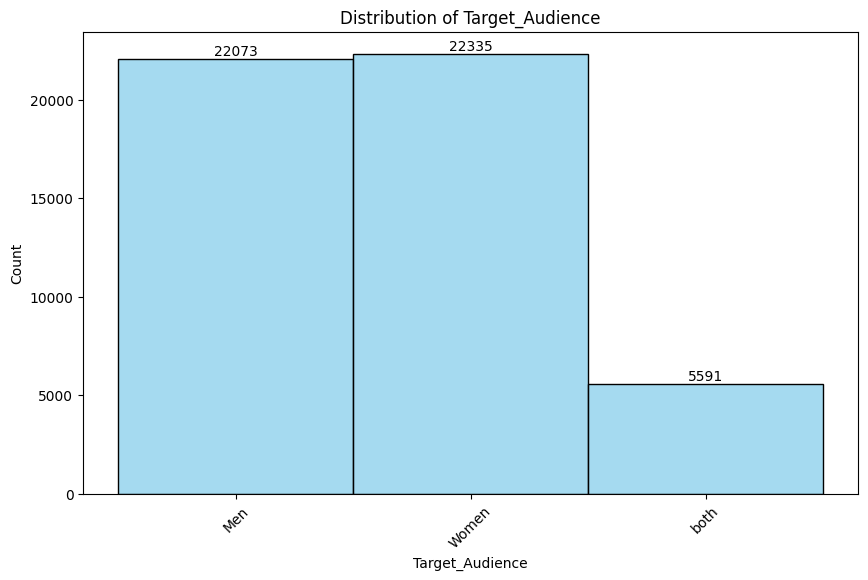

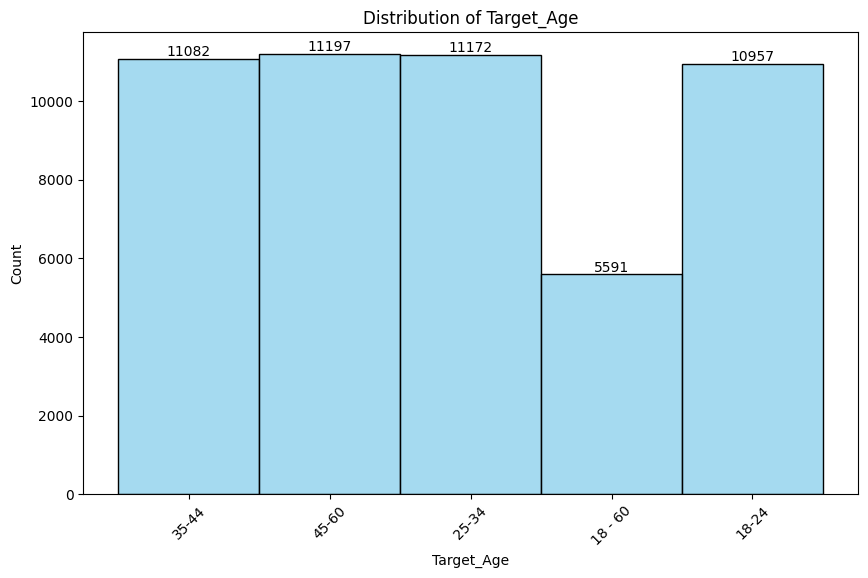

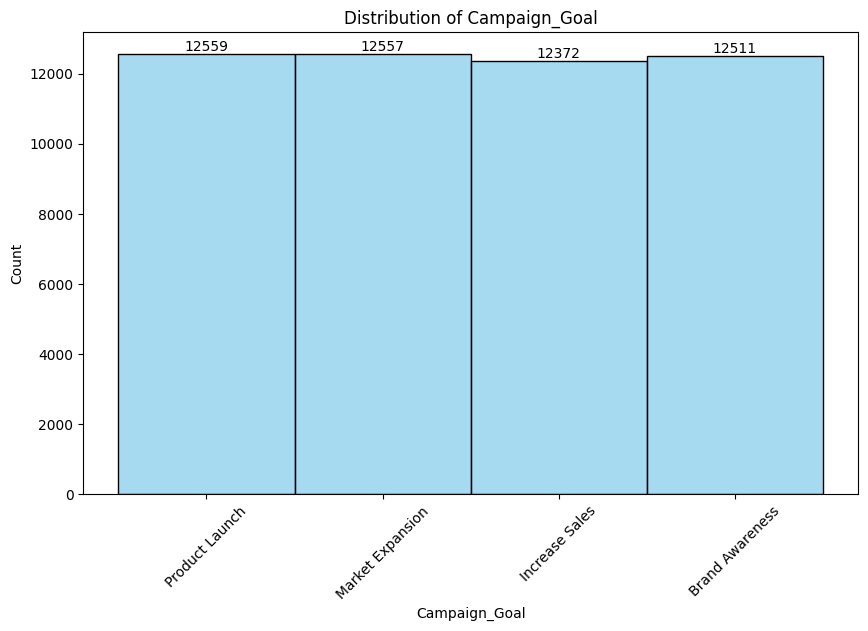

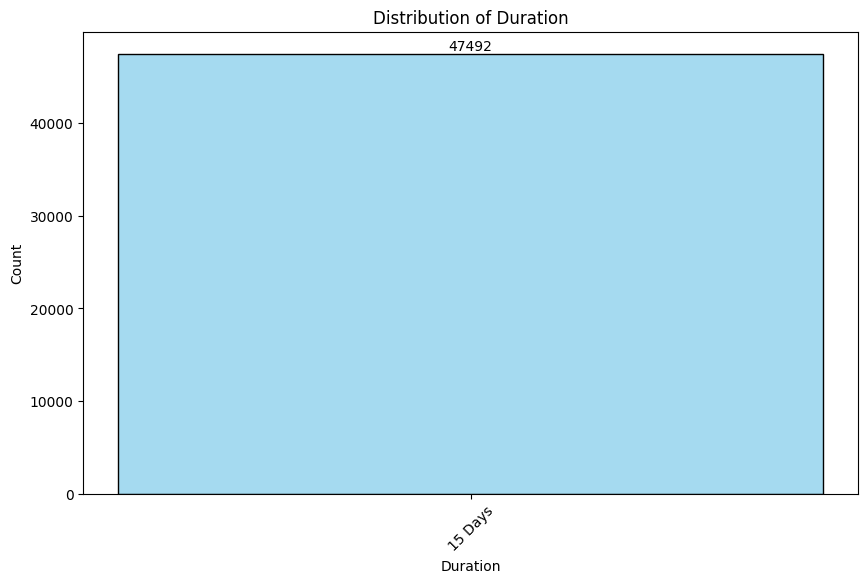

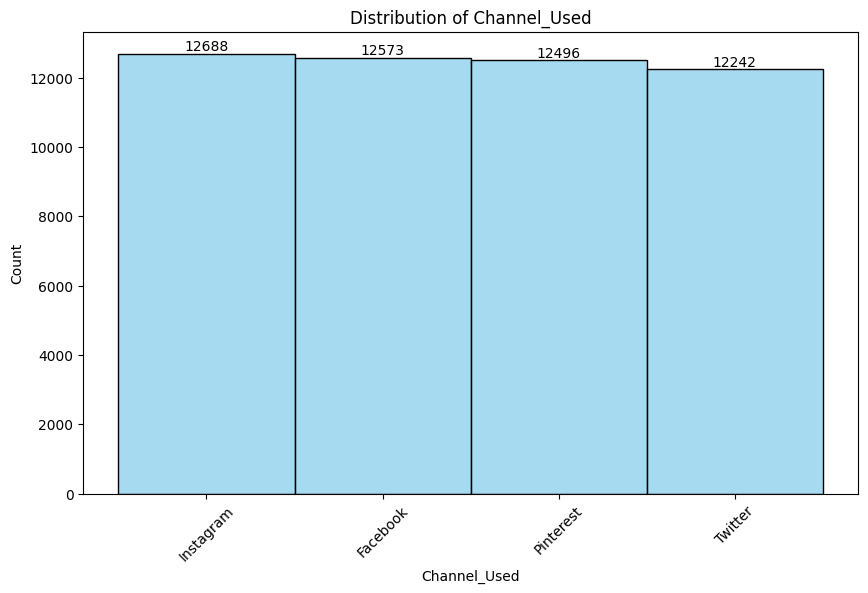

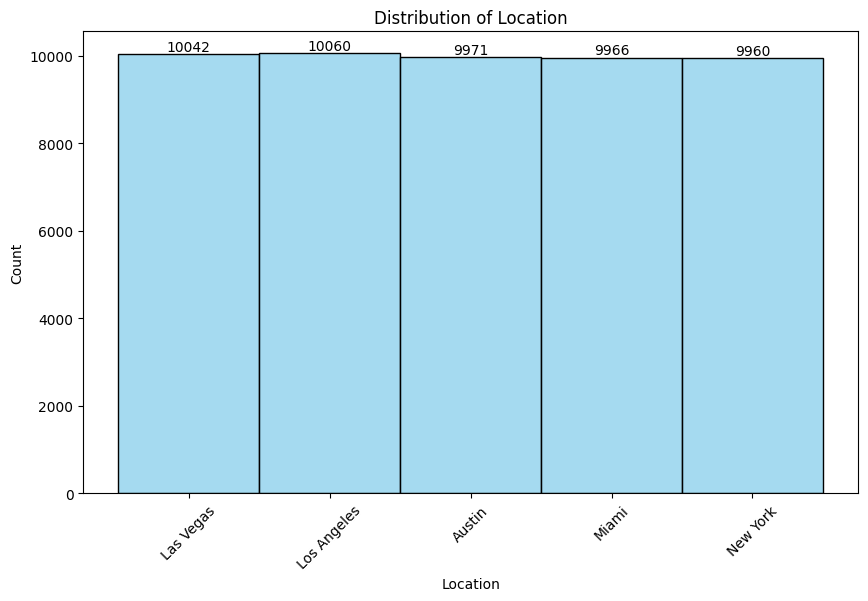

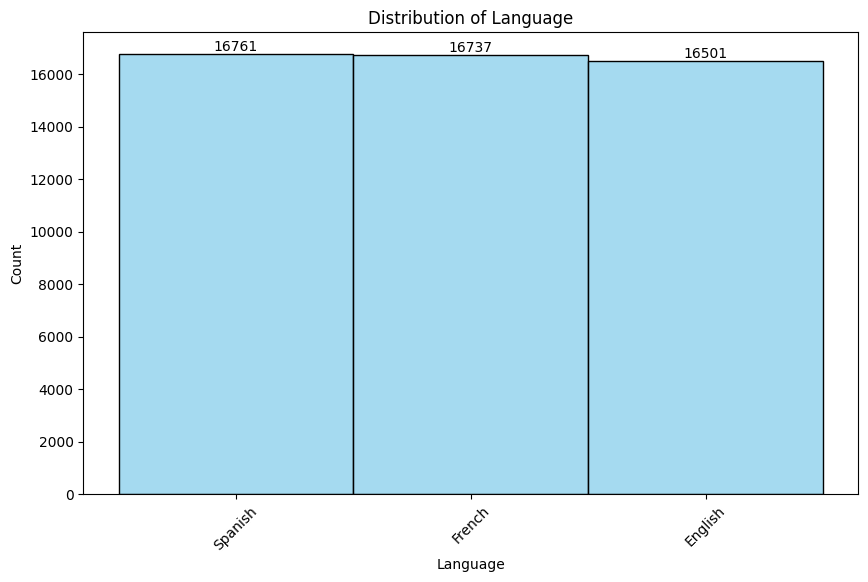

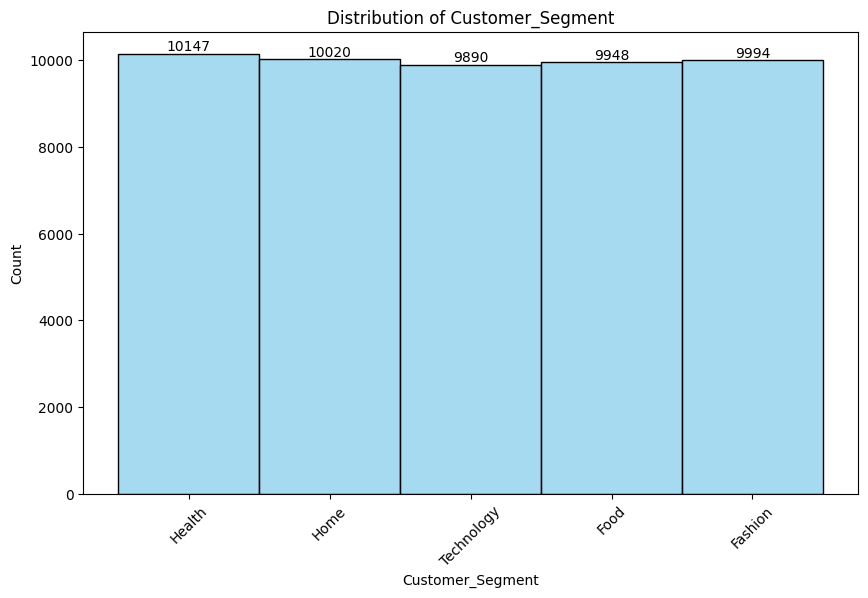

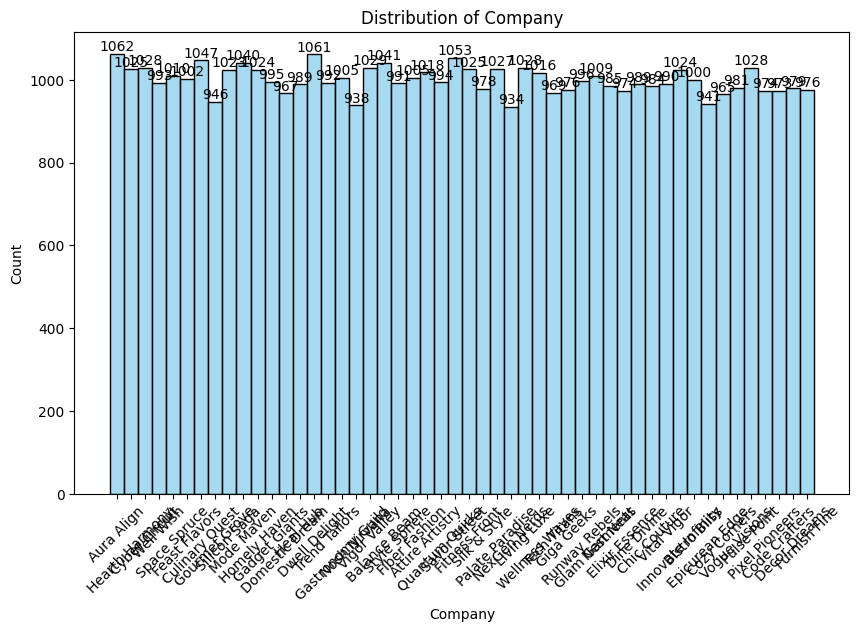

In [ ]:
def univariate_cat(d, var):
    plt.figure(figsize=(10,6))
    a = sns.histplot(d[var], kde=False, discrete=True, color='skyblue')
    for i in a.containers:
        a.bar_label(i)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()
for i in Cat_columns.columns:
    univariate_cat(Cat_columns, i)

#### The insights which are derived from above visualization i.e univariate analysis for categorical columns are

##### Target_Audience :From the above target_audience visualisation we can say thet men and women both are slightly equal,compared to men  "women" count is high with 22335 and "mens" count is 22073 compared to men and women "both" is very less

##### Target_Age :From the above Target_Age visualisation we can say that except "18-60" age group the other age groups are slightly equal from all of them "45-60" age group is high with 11197 and "18-60" age group is very less with 5591

##### Campaign_Goal : From the above Campaign_Goal visualisation we can say that they are slightly equal to each and everyone from all of them "product launch" is high with 12559 and last is "increase sales" with 12372

##### Duration: it has only "15 days" in it.
##### Channel_Used:From the above Channel_Used visualisation we can say that all are slightly equal but from all of them "instagram" is high with 12688 and "twitter" is less with 12242

##### Location:From the above Location visualisation we can say that all are slightly equal to each other but compared to all features "los angeles" is high with 10060 and "new york" is less with 9960

##### Language:From the above Language visualisation we can say that all are equal to each other compared to all of them "spanish" language is high with 16761 and "english" language is low with 16501

##### Customer_Segment:From the above Customer_Segment visualisation we can say that all are equal to each other compared to all of them "health" has high with 10147 and "food" has less with 9948

##### Company:From the above Company visualisation we can say that "aura align" company is high with 1062 and "silk & style" company is less with 934

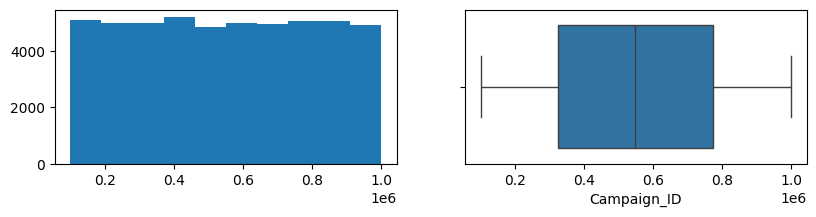

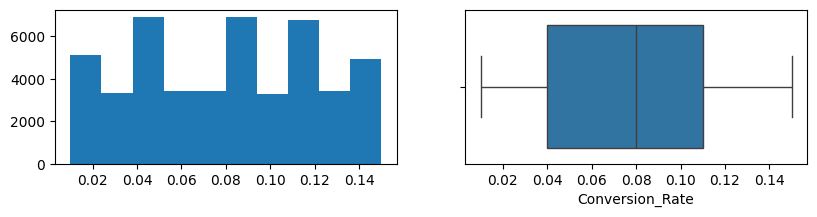

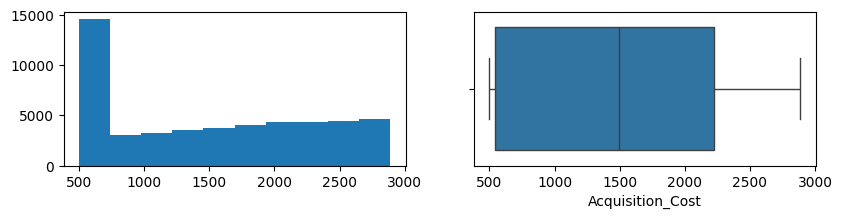

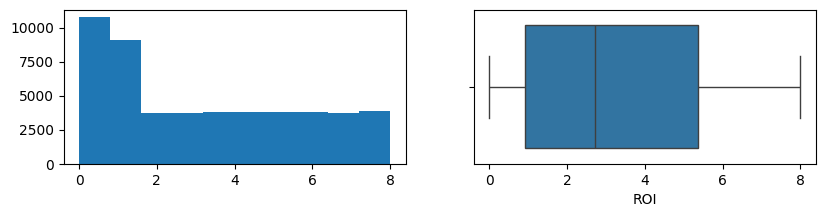

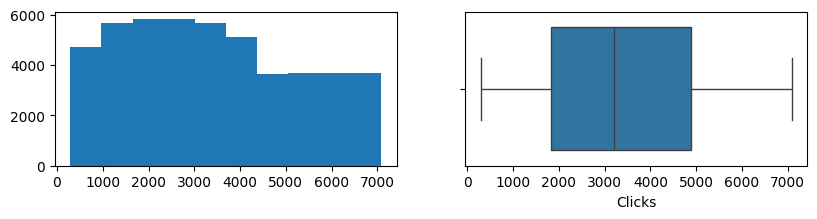

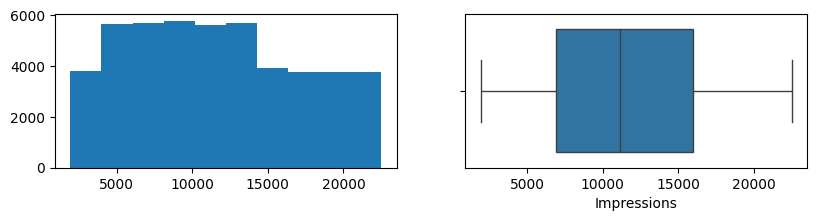

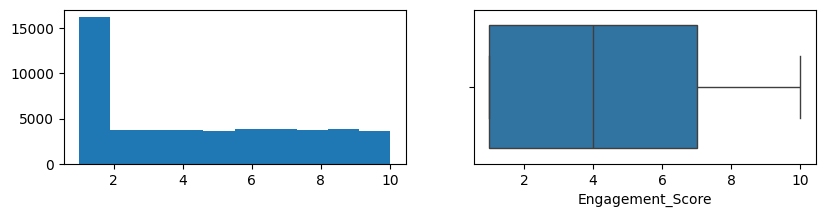

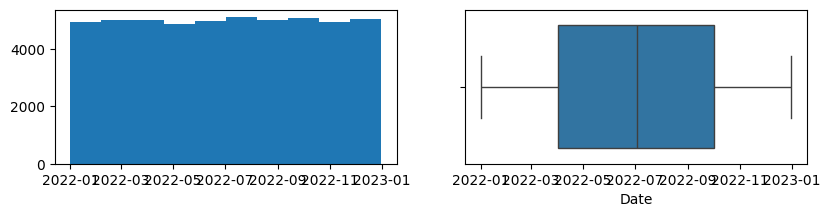

In [ ]:
def univariate_num(data,var):
    plt.figure(figsize=(15,2))
    plt.subplot(1,3,1)
    plt.hist(data[var])
    plt.subplot(1,3,2)
    sns.boxplot(x=data[var])
for i in Num_columns.columns:
    univariate_num(data,i)

#### The insights which are derived from above visualization i.e univariate analysis for numerical columns are

##### Campaign_ID : From the above visualization we can say that the campaign_id features are slightly equal to each other compared to all of them 0.4 is bit more high

##### Conversion_Rate : from the above conversion_rate visualization we can say that 0.04 and 0.08 are equal and also high compared to the remaining and 0.14 is less    

##### Acquisition_Cost :from the above acquisition_cost we can say that the only highest value is 500 and the lowest compared to all is 1000

##### ROI [Return on Investment]:from the above roi visualisation we can say that 0 to 1 is the highest and 2 to 3 is the lowest         

##### Clicks :from the above clicks visualisation we can say that 2000 and 3000 is the highest and 4000 is the lowest

##### Impressions :from the above impressions visualisation we can say that 10000 is the highest and 500,20000 is the lowest

##### Engagement_Score :from the above engagement_score visualisation we can say that 1 is the highest and 5 is the lowest   

##### Date :it have data from 2022 to 2023 from the above Date visualisation we can say that all are slightly equal to each other 07-2022 is a bit high from all of them and 03-2022 is less

In [ ]:
data.describe()

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score,Date
count,49999.000000,47488.000000,49999.000000,49999.000000,47533.000000,47529.000000,49999.000000,49999
mean,548784.539171,0.079727,1494.485207,3.194929,3398.154608,11616.253382,4.374167,2022-07-02 11:27:00.536410880
min,100003.000000,0.010000,500.000000,0.000000,293.000000,1937.000000,1.000000,2022-01-01 00:00:00
25%,323185.000000,0.040000,542.895000,0.927698,1829.000000,6939.000000,1.000000,2022-04-02 00:00:00
50%,548371.000000,0.080000,1492.450000,2.710000,3215.000000,11179.000000,4.000000,2022-07-03 00:00:00
75%,774407.500000,0.110000,2222.490000,5.360000,4892.000000,16007.000000,7.000000,2022-10-01 00:00:00
max,999993.000000,0.150000,2887.250000,8.000000,7082.000000,22498.000000,10.000000,2022-12-31 00:00:00
std,260054.290282,0.040487,808.596461,2.468945,1867.457524,5563.913175,3.156264,NaN


**<h1>Bivariate Analysis</h1>**

Bivariate used for the analysis of two variables to know the relationship between them.

**Purpose:**
    To determine the type of relationship (e.g., linear, non-linear).

**Types of Bivariate Analysis**

    1.Numerical vs. Numerical
    check relationships between two continuous variables.

    2.Categorical vs. Categorical
    check relationships between two categorical variables.

    3.Numerical vs. Categorical
    check the relationship between a continuous variable and a categorical variable.

**Visualization Tools for Bivariate Analysis**
    
    Scatter Plot: For Numerical vs. Numerical.
    Heatmap: Correlation visualization for multiple pairs of numerical variables.
    Bar Chart: For categorical relationships.
    Box Plot: To compare distributions.


#### Numerical vs Numerical

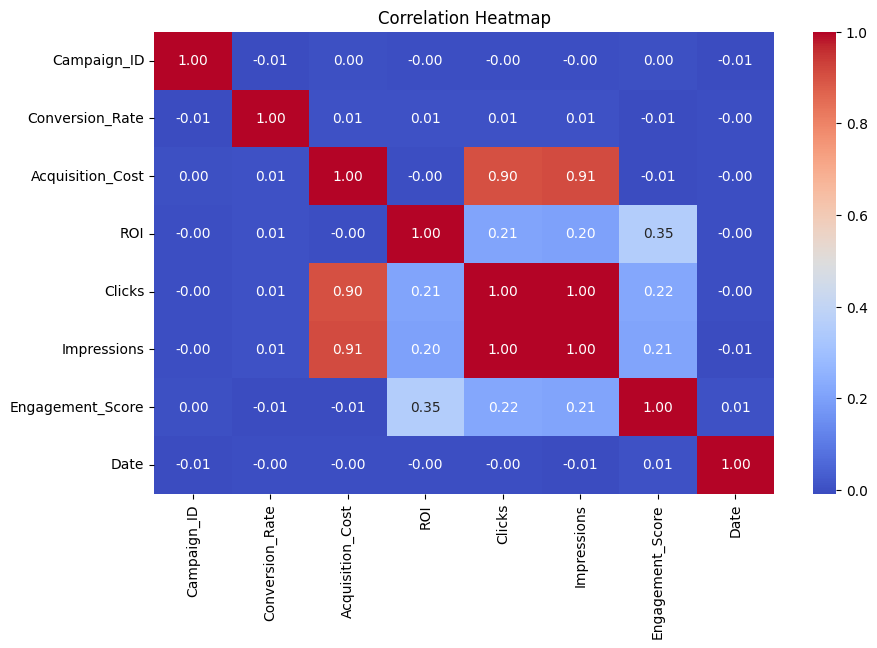

In [ ]:
def bivariate_nn(data):
    # Correlation Heatmap for numerical data
    corr = data.select_dtypes(include=['float64', 'int64', 'datetime64[ns]']).corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()
bivariate_nn(data)

#### The insights which are derived from above visualization i.e bivariate analysis for numerical columns vs numerical columns are

from the above visualisation we can say that there is a strong relation between acquisition_cost ,clicks and impressions and also there is a weak relation between ROI,clicks and impressions

#### Categorical vs Numerical

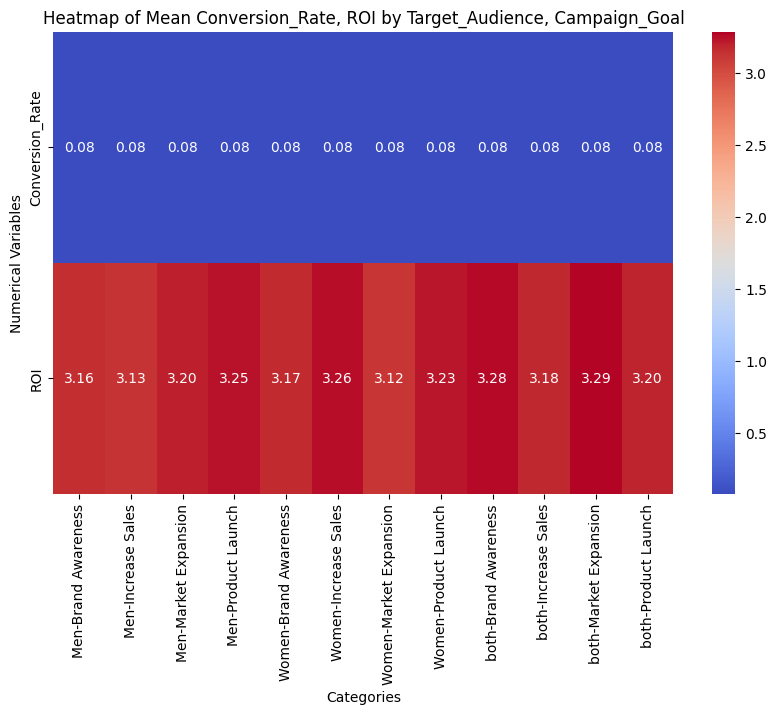

In [ ]:
def bivariate_nc(data, cat_columns, num_columns, agg_func='mean'):
    grouped_data = data.groupby(cat_columns)[num_columns].agg(agg_func).reset_index()
    plt.figure(figsize=(10, 6))
    sns.heatmap(grouped_data.set_index(cat_columns).transpose(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title(f'Heatmap of {agg_func.capitalize()} {", ".join(num_columns)} by {", ".join(cat_columns)}')
    plt.xlabel('Categories')
    plt.ylabel('Numerical Variables')
    plt.show()
bivariate_nc(data, cat_columns=['Target_Audience', 'Campaign_Goal'], num_columns=['Conversion_Rate', 'ROI'], agg_func='mean')


#### The insights which are derived from above visualization i.e bivariate analysis for categorical columns vs numerical columns are

the above visualisation says that campaign goals and targeting strategies have higher ROI

#### Categorical vs Categorical

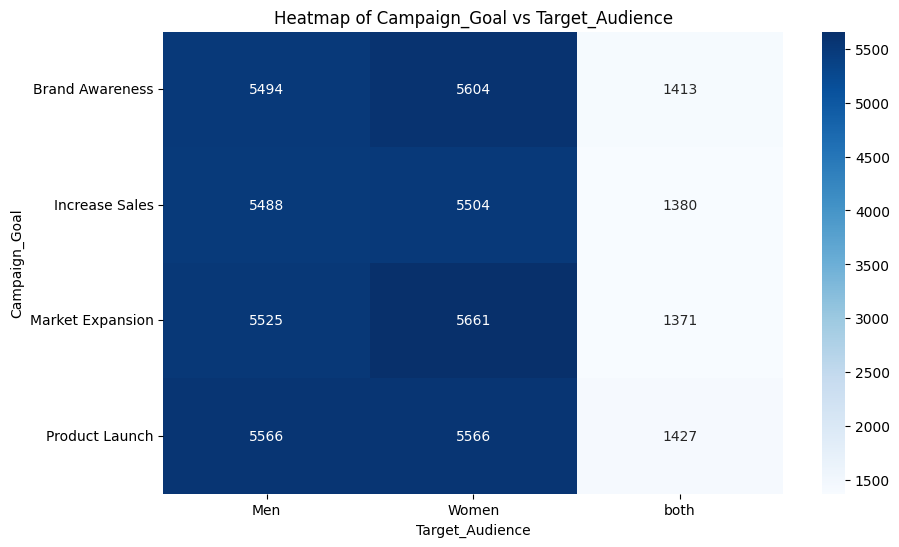

In [ ]:
def bivariate_cc(data, cat_col1, cat_col2):
    contingency_table = pd.crosstab(data[cat_col1], data[cat_col2])
    plt.figure(figsize=(10, 6))
    sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
    plt.title(f'Heatmap of {cat_col1} vs {cat_col2}')
    plt.xlabel(cat_col2)
    plt.ylabel(cat_col1)
    plt.show()
bivariate_cc(data, cat_col1='Campaign_Goal', cat_col2='Target_Audience')


#### The insights which are derived from above visualization i.e bivariate analysis for categorical columns vs categorical columns are

from the above visualisation we can say that in the product launch compared all of them  men and women shown the higher interest with 5566

for market_expansion compared to all of them women are the highest part with 5661

for increase sales compared to all of them men are the highest part with 5488

for brand_awareness compared to all of them men are the highest part with 5494
